In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import glob

In [4]:
data_dir = '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/segmentation'

In [7]:
image_path = pwd + '/CNCB/image/'
mask_path = pwd + '/CNCB/mask/'

In [21]:
mask_dirs = os.listdir(mask_path) 
print(mask_dirs[:10])

image_list = [] 
mask_list = [] 

for m in mask_dirs: 
    
    m_path = mask_path + m   
    i_path = image_path + m 
    
    if os.path.isfile(m_path):
        print("{} is a file".format(m_path))
        continue 
    
    mfiles = os.listdir(m_path) 
    
    for mf in mfiles: 
        
        mfile = m_path + '/' + mf  
        ifile = i_path + '/' + mf[:-3]+'jpg'  
        
        #print(mfile)
        #print(ifile)
                
        image_list.append(ifile)
        mask_list.append(mfile)
        
print(len(image_list))
print(len(mask_list))

['67', '118', '55', '146', '15', '119', '60', '7', '26', '143']
/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/.DS_Store is a file
750
750


load image from path

In [22]:
image_list[:10] # list of image in file

['/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/image/67/69.jpg',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/image/67/115.jpg',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/image/67/23.jpg',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/image/67/46.jpg',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/image/67/92.jpg',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/image/118/159.jpg',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/image/118/95.jpg',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/image/118/31.jpg',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/image

In [23]:
mask_list[:10] # list of mask image in file

['/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/67/69.png',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/67/115.png',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/67/23.png',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/67/46.png',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/67/92.png',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/118/159.png',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/118/95.png',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/118/31.png',
 '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/preprocess/CT-Image-Segmentation/CNCB/mask/118/127.

image value type is unsigned int

The lungs image shape is 16bit(grayscale(8), alpha(8))

In [32]:
img = cv2.imread(image_list[0], 0)
img.shape

(512, 512)

In [33]:
np.unique(img)

array([ 10,  14,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 19

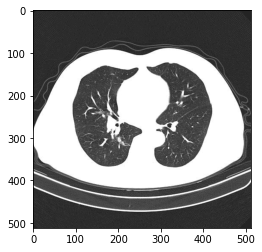

In [34]:
plt.imshow(img, cmap = 'gray')
plt.show()

In [35]:
IMG_H, IMG_W = 512, 512

In [36]:
dataX, dataY = np.empty((2, len(image_list), IMG_H, IMG_W, 1), dtype=np.float32)

In [37]:
dataX.shape

(750, 512, 512, 1)

image resize

In [49]:
for i, image in enumerate(image_list):
    
    # changing value type uint to int, float is changed to calculate
    img = cv2.imread(image, 0).astype("int16").astype('float32')
    #print(img.shape)        
    #img = cv2.resize(img, dsize=(IMG_W, IMG_H))
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    
    dataX[i] = np.expand_dims(img, axis = 2)    


In [50]:
dataX.shape

(750, 512, 512, 1)

In [45]:
mask = cv2.imread(mask_list[0], 0)
print(mask.shape)
np.unique(mask)


(512, 512)


array([0, 1, 2], dtype=uint8)

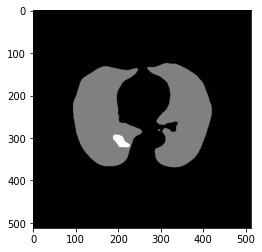

In [46]:
plt.imshow(mask, cmap = 'gray')
plt.show()

In [47]:
mask[mask>=1] = 1 
np.unique(mask)


array([0, 1], dtype=uint8)

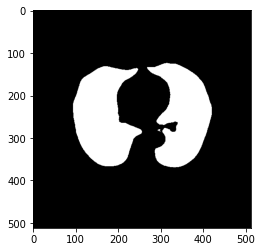

In [48]:
plt.imshow(mask, cmap = 'gray')
plt.show()

In [51]:
for i, image in enumerate(mask_list):
    img = cv2.imread(image, 0) #  .astype('float32')
    #img = cv2.resize(img, dsize=(IMG_W, IMG_H))    
    img[img>=1] = 1 #lung mask     
    dataY[i] = np.expand_dims(img, axis = 2)


In [52]:
dataY.shape

(750, 512, 512, 1)

In [53]:
np.unique(dataX[0,0,:10])

array([0.13877551, 0.14285715, 0.14693877, 0.15102041], dtype=float32)

In [54]:
np.unique(dataY)

array([0., 1.], dtype=float32)

rescale of image

plot image and mask of image

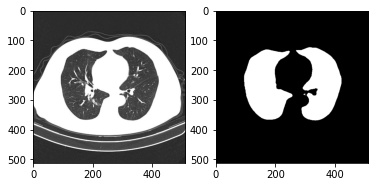

In [55]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(dataX[0].squeeze(), cmap='gray')
ax[1].imshow(dataY[0].squeeze(), cmap='gray')
plt.show()

Divide train and test data

In [56]:
#load previous data  

save_dir = data_dir + "dataset/" # path where you want to save

trainX1 = np.load(save_dir+'x_train_512.npy')
trainY1 = np.load(save_dir+'y_train_512.npy')
testX1 = np.load(save_dir+'x_test_512.npy')
testY1 = np.load(save_dir+'y_test_512.npy')

print(trainX1.shape,trainY1.shape)
print(testX1.shape,testY1.shape)


(213, 512, 512, 1) (213, 512, 512, 1)
(54, 512, 512, 1) (54, 512, 512, 1)


In [58]:
dataX1 = np.concatenate((trainX1, testX1), axis=0)
dataY1 = np.concatenate((trainY1, testY1), axis=0)
print(dataX1.shape,dataY1.shape)


(267, 512, 512, 1) (267, 512, 512, 1)


In [59]:
dataX2 =  np.concatenate((dataX, dataX1), axis=0)
dataY2 =  np.concatenate((dataY, dataY1), axis=0)
print(dataX2.shape,dataY2.shape)


(1017, 512, 512, 1) (1017, 512, 512, 1)


In [62]:
trainX, testX = train_test_split(dataX2, test_size = 0.05, random_state=50)
trainY, testY = train_test_split(dataY2, test_size = 0.05, random_state=50)

In [63]:
save_dir = data_dir + "dataset/" # path where you want to save

if not os.path.exists(save_dir): # if there is no exist, make the path
    os.makedirs(save_dir)
    
np.save(save_dir+'x_train_512.npy', trainX)
np.save(save_dir+'y_train_512.npy', trainY)
np.save(save_dir+'x_test_512.npy', testX)
np.save(save_dir+'y_test_512.npy', testY)

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(966, 512, 512, 1) (966, 512, 512, 1)
(51, 512, 512, 1) (51, 512, 512, 1)
